In [3]:
from agent import Agent
from monitor import interact
import gym
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
optimal_sarsa_max = {'algorithm': 'sarsamax','alpha': 0.2512238484351891, 'epsilon_cut': 0, 'epsilon_decay': 0.8888782926665223, 'start_epsilon': 0.9957089031634627, 'gamma': 0.7749915552696941}
optimal_exp_sarsa = {'algorithm': 'exp_sarsa', 'alpha': 0.2946281065178629, 'epsilon_cut': 0, 'epsilon_decay': 0.8978159313202051, 'start_epsilon': 0.9803552534195048, 'gamma': 0.6673937505783256}


In [5]:
env = gym.make('Taxi-v3')
agent = Agent(**optimal_sarsa_max)
avg_rewards_sarsamax, best_avg_reward_sarsamax = interact(env, agent)

agent = Agent(**optimal_exp_sarsa)
avg_rewards_exp_sarsa, best_avg_exp_sarsa = interact(env, agent)

Episode 20000/20000 || Best average reward 8.766

Episode 20000/20000 || Best average reward 8.794



In [7]:
data[data.type=='Sarsa Max'].max()

reward          8.76
episode        19900
type       Sarsa Max
dtype: object

In [8]:
data[data.type=='Expectation Sarsa'].max()

reward                   8.7
episode                19900
type       Expectation Sarsa
dtype: object

In [9]:
data = pd.DataFrame(list(avg_rewards_sarsamax), columns=['reward'])
data.loc[:,'episode'] = range(0,len(list(avg_rewards_sarsamax)))
data.loc[:,'type'] = 'Sarsa Max'

data1 = pd.DataFrame(list(avg_rewards_exp_sarsa), columns=['reward'])
data1.loc[:,'episode'] = range(0,len(list(avg_rewards_sarsamax)))
data1.loc[:,'type'] = 'Expectation Sarsa'

data = data1.append(data)

In [10]:
data

,reward,episode,type
0,-265.71,0,Expectation Sarsa
1,-259.06,1,Expectation Sarsa
2,-254.29,2,Expectation Sarsa
3,-248.71,3,Expectation Sarsa
4,-242.68,4,Expectation Sarsa
...,...,...,...
19896,7.96,19896,Sarsa Max
19897,7.97,19897,Sarsa Max
19898,7.87,19898,Sarsa Max
19899,7.93,19899,Sarsa Max


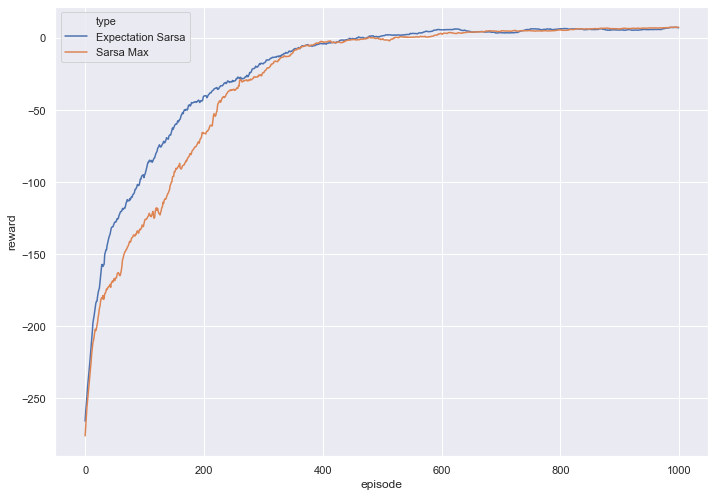

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.lineplot(x='episode', y='reward', hue='type',data = data[data.episode<1000])
sns_plot.figure.savefig("tax1v3.png")

In [14]:
#Who wins more often? SarsaMax of Expectation Sarsa?
sarsa_max_wins = 0
for i in range(10):
    env = gym.make('Taxi-v3')
    agent = Agent(**optimal_sarsa_max)
    avg_rewards_sarsamax, best_avg_reward_sarsamax = interact(env, agent)

    agent = Agent(**optimal_exp_sarsa)
    avg_rewards_exp_sarsa, best_avg_exp_sarsa = interact(env, agent)
    
    if best_avg_reward_sarsamax>best_avg_exp_sarsa: sarsa_max_wins += 1

Episode 20000/20000 || Best average reward 9.077

Episode 20000/20000 || Best average reward 8.789

Episode 20000/20000 || Best average reward 8.715

Episode 20000/20000 || Best average reward 8.754

Episode 20000/20000 || Best average reward 8.878

Episode 20000/20000 || Best average reward 8.795

Episode 20000/20000 || Best average reward 8.812

Episode 20000/20000 || Best average reward 8.648

Episode 20000/20000 || Best average reward 8.742

Episode 20000/20000 || Best average reward 8.791

Episode 20000/20000 || Best average reward 8.799

Episode 20000/20000 || Best average reward 8.812

Episode 20000/20000 || Best average reward 8.792

Episode 20000/20000 || Best average reward 8.723

Episode 20000/20000 || Best average reward 8.682

Episode 20000/20000 || Best average reward 8.931

Episode 20000/20000 || Best average reward 8.933

Episode 20000/20000 || Best average reward 8.753

Episode 20000/20000 || Best average reward 8.748

Episode 20000/20000 || Best average reward 8.719



In [15]:
print(f'Sarsa max wins in {sarsa_max_wins/10*100}% of cases')

Sarsa max wins in 60.0% of cases
